In [1]:
#Import numpy, matplotlib, and the airsea_fluxes libraries
import numpy as np
import matplotlib.pyplot as plt
import airsea_fluxes.airsea_fluxes as flx

First we demonstrate the Wanninkhof 2014 parameterization, with the option to change the coefficient:

$$
k_{w660} = c_1 u_{10N}^2
$$

where $u_{10N}$ is the neutral 10 meter wind speed, $c_1$ is a non-dimensional coefficient, and $k_{w660}$ is the gas transfer velocity standardized at a Schmidt number of 660.

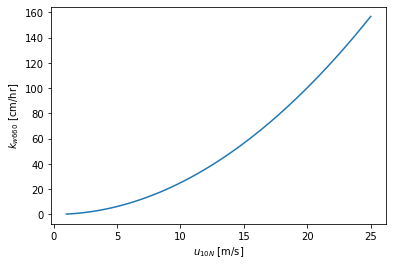

In [6]:
U10 = np.linspace(1,25.,50)
kw660_W14 = flx.W14(U10,.251) #The second argument (.251) is the value of c1 above.
plt.plot(U10,kw660_W14)
plt.xlabel('$u_{10N}$ [m/s]')
plt.ylabel('$k_{w660}$ [cm/hr]')

pass;

Next we demonstrate the Deikie and Melville, 2018 parameterization, which also has coefficients that can be set

There are a number of steps before the parameterization can be called.  Here we assume we have the following data available: $u_{10N}$ (10-meter neutral wind speed), $h_s$ (significant wave height), $T_0$ (SST in degrees Celcius), $S_0$ (Sea surface salinity in ppt).

$u_{10N}$ is converted to $u_*$ (air-side friction velocity) using a constant drag coefficient of 0.002.  This can easily be updated to use (for example) the COARE flux drag coefficient, 0.002 is chosen here merely for simplicity of demonstration.

The wave height is assumed to vary linearly with wind speed; preferably wave height is provided externally via observations or model.  The assumed wave height here is merely for demonstration.

Steps:  
1. Compute Schmidt number from SST using a simple parameterization.  
2. Compute solubility from SST and SSS using a simple parameterization.  Notice SST is converted to Kelvin.  
3. Compute non-dimensional solubility alpha from solubility and SST, notice SST is converted to Kelvin.  
4. Compute the DM18 value of $k_{w660}$ from the formula provided by Deike and Melville, 2018 (their eq 12):

$$
k_{w660} = k_{w660}^{NB} + k_{w660}^{B}
$$
where $k_{w660}^{NB}$ is the non-bubble contribution and $k_{w660}^B$ is the bubble contribution.  

The formula for the non-bubble contribution is:
$$
k_{w660}^{NB} = a_{NB} u_*,
$$
where $a_{NB}$ is a non-dimensional coefficient (given as 1.66e-4 in DM18, but taken as a tuning parameter in Reichl and Deike, 2020.  

The formula for the bubble contribution is:
$$
k_{w660}^{B} = a_{B} u_*^{\gamma} \sqrt{g h_s}^{\zeta} {\alpha}^{-1},
$$
where $a_B = \tilde{a}_B \sqrt{Sc/660}$ and $\tilde{a_B}=1. \pm 0.2 e-5 {\rm m}^{-2}{\rm s}^2$ following DM18, $h_s$ is the significant wave height, and $\gamma=5/3$ and $\zeta=4/3$ are fit to the data in DM18 and satisfy dimensional constraints.  The value of $\tilde{a}_B$ is also taken to be a tuning parameter in Reichl and Deike, 2020.


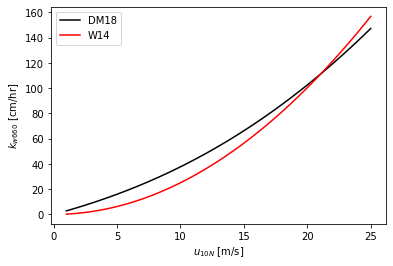

In [8]:
u10 = np.linspace(1,25.,50)
cd = 0.002
ustar = np.sqrt(cd)*u10
hs = np.linspace(1,5,50)
sst = 15.*np.ones(np.shape(hs))
sss = 35.*np.ones(np.shape(hs))

sc_no = flx.SchmidtNumber(sst)
k0 = flx.Solubility(sst+273.15,sss)
alpha = flx.Alpha(k0,sst+273.15)

mps2cph = 3600.*100.
#Note these are output in m/s, not cm/hr!!
kw660_DM18 = flx.DM18(ustar,hs,alpha,sc_no,anb=1.66e-4,abt=1.1e-5)
plt.plot(u10,kw660_DM18*mps2cph,'k-',label='DM18')
plt.plot(u10,kw660_W14,'r-',label='W14')
plt.legend()
plt.xlabel('$u_{10N}$ [m/s]')
plt.ylabel('$k_{w660}$ [cm/hr]')

pass;

One more sample, just to show that the DM18 $k_{w660}$ value changes as hs changes at a given wind speed

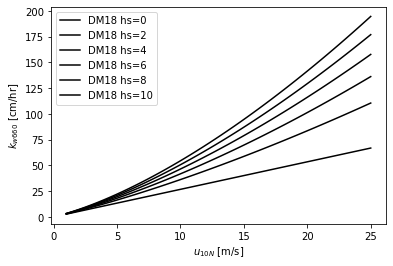

In [12]:
u10 = np.linspace(1,25.,50)
cd = 0.002
ustar = np.sqrt(cd)*u10
sst = 15.*np.ones(np.shape(ustar))
sss = 35.*np.ones(np.shape(ustar))
for hs in [0,2,4,6,8,10]:

    sc_no = flx.SchmidtNumber(sst)
    k0 = flx.Solubility(sst+273.15,sss)
    alpha = flx.Alpha(k0,sst+273.15)

    mps2cph = 3600.*100.
    #Note these are output in m/s, not cm/hr!!
    kw660_DM18 = flx.DM18(ustar,hs,alpha,sc_no,anb=1.66e-4,abt=1.1e-5)
    plt.plot(u10,kw660_DM18*mps2cph,'k-',label='DM18 hs='+str(hs))
    plt.legend()
    plt.xlabel('$u_{10N}$ [m/s]')
    plt.ylabel('$k_{w660}$ [cm/hr]')

    pass;